# Testing and regularization

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/polynomial_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 378, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 378 (delta 74), reused 3 (delta 1), pack-reused 252 (from 1)
Receiving objects: 100% (378/378), 42.71 MiB | 15.28 MiB/s, done.
Resolving deltas: 100% (197/197), done.
/content/machine_learning_1/polynomial_regression


In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

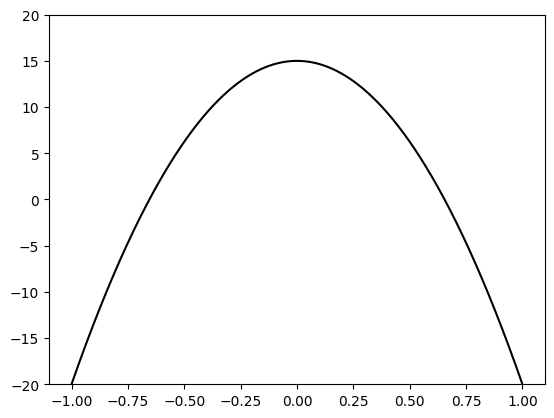

In [7]:
# Our original polynomial is -35x^2+x+15
coefs = [15,0,-35]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-1, 1, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [9]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-1,1)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

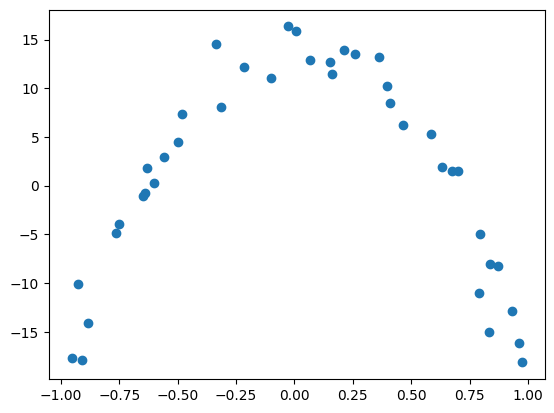

In [10]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [11]:
for datasample in zip(X,Y):
    print(datasample)

(np.float64(0.7963462427157579), np.float64(-4.987021692199473))
(np.float64(-0.21740789953075024), np.float64(12.186494719897935))
(np.float64(0.4105667997088125), np.float64(8.51416927556333))
(np.float64(0.6989719303727342), np.float64(1.5074515503972998))
(np.float64(0.7900779348533504), np.float64(-10.981245193989203))
(np.float64(0.15939002149121184), np.float64(11.49489831282274))
(np.float64(-0.09887378673768965), np.float64(11.083923326370371))
(np.float64(0.8338824358949122), np.float64(-14.98842561565315))
(np.float64(0.5866501682604484), np.float64(5.348645335503234))
(np.float64(-0.027111596061666354), np.float64(16.33736440541925))
(np.float64(0.2602946808229456), np.float64(13.468136581792084))
(np.float64(0.46297844158169554), np.float64(6.263787056401539))
(np.float64(-0.765731413582964), np.float64(-4.865413486859145))
(np.float64(-0.3349277015606891), np.float64(14.571036079808291))
(np.float64(0.631826193067319), np.float64(1.935578622920234))
(np.float64(0.39534128

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [24]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    poly = PolynomialFeatures(degree=polyDegree, include_bias=False)
    X = poly.fit_transform(X.reshape(-1, 1))
    return X
X_poly=addPoly(X,200)

In [25]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 200)
[7.96346243e-01 6.34167338e-01 5.05016777e-01 4.02168213e-01
 3.20265145e-01 2.55041945e-01 2.03101695e-01 1.61739272e-01
 1.28800461e-01 1.02569763e-01 8.16810456e-02 6.50463938e-02
 5.17994513e-02 4.12502984e-02 3.28495202e-02 2.61595919e-02
 2.08320928e-02 1.65895588e-02 1.32110328e-02 1.05205563e-02
 8.37800552e-03 6.67179321e-03 5.31305746e-03 4.23103334e-03
 3.36936751e-03 2.68318315e-03 2.13674282e-03 1.70158712e-03
 1.35505251e-03 1.07909097e-03 8.59330043e-04 6.84324251e-04
 5.44959046e-04 4.33976089e-04 3.45595228e-04 2.75213461e-04
 2.19165206e-04 1.74531388e-04 1.38987415e-04 1.10682106e-04
 8.81412791e-05 7.01909764e-05 5.58963204e-05 4.45128247e-05
 3.54476207e-05 2.82285796e-05 2.24797233e-05 1.79016432e-05
 1.42559063e-05 1.13526374e-05 9.04063014e-06 7.19947184e-06
 5.73327235e-06 4.56566989e-06 3.63585407e-06 2.89539872e-06
 2.30573990e-06 1.83616730e-06 1.46222493e-06 1.16443733e-06
 9.27295293e-07 7.38448123e-07 5.88060388e-07 4.68299680e-07
 3.72928691e-0

## Splitting data into training and testing

In [34]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.33, random_state=52)

In [36]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# model_no_reg = LinearRegression()
# model_no_reg.fit(X_train, y_train)

# إنشاء موديل مع normalisation
model_no_reg = make_pipeline(
    StandardScaler(),   # يقوم بتطبيع X
    LinearRegression()  # ثم تدريب LinearRegression
)

# تدريب الموديل
model_no_reg.fit(X_train, y_train)
lr_model = model_no_reg[-1]


Training error (rmse): 16731236.419667073
Testing error (rmse): 9507025.416342746


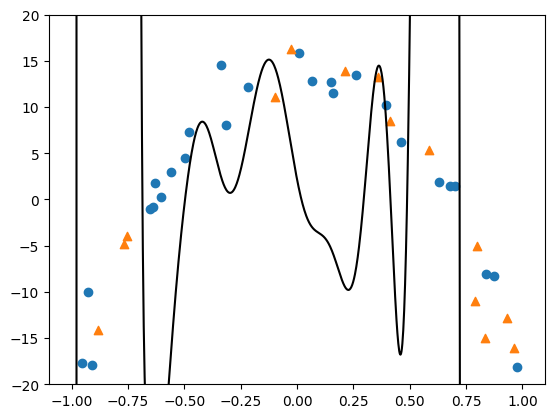

Polynomial coefficients
[np.float64(2.2176217239952587), np.float64(-125.46418200707554), np.float64(563.6033747579374), np.float64(4475.3053555273455), np.float64(-28597.94057705951), np.float64(-114882.16762698728), np.float64(397551.22562987823), np.float64(1866119.7274976487), np.float64(-1383049.0440183931), np.float64(-16021379.933347413), np.float64(-9133848.213257235), np.float64(71921565.89419779), np.float64(83319451.84473747), np.float64(-166172695.6613976), np.float64(-220235552.0635002), np.float64(174809442.00484034), np.float64(150862305.1625664), np.float64(-30055757.538601384), np.float64(186727011.35515866), np.float64(-76069702.87997085), np.float64(-95026172.35103922), np.float64(32836801.928140126), np.float64(-229367013.01703176), np.float64(61087550.17364884), np.float64(-117928171.83726642), np.float64(-8682296.345819838), np.float64(71626826.58897652), np.float64(-80467243.37148137), np.float64(188241869.04726818), np.float64(-94476817.09162687), np.float64(192

In [98]:
# display_results(model_no_reg)
display_results(lr_model)

## Training a polynomial regression model with L1 regularization

In [107]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
## TODO ##
# use sklearn Lasso (linear regression with L1 Norm) to fit the data

model_L1_reg = Lasso(alpha=0.1) # You can adjust alpha
model_L1_reg.fit(X_train, y_train)

# # إنشاء موديل Lasso مع normalization
# model_L1_reg = make_pipeline(
#     StandardScaler(),  # Normalize features
#     Lasso(alpha=0.1)   # L1 regularization
# )

# # تدريب النموذج
# model_L1_reg.fit(X_train, y_train)
# lr_model = model_L1_reg[-1]


Lasso(alpha=0.1)

Training error (rmse): 2.0165120749377907
Testing error (rmse): 3.062397595673112


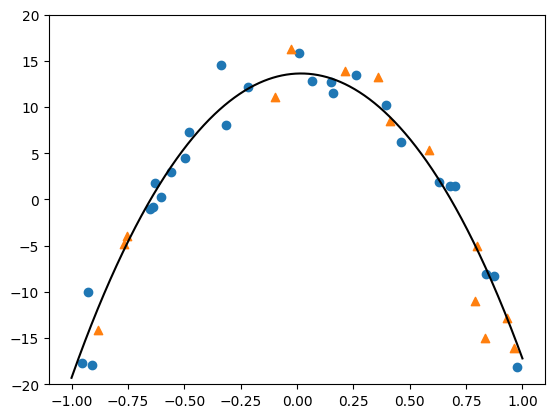

Polynomial coefficients
[np.float64(13.626740103457227), np.float64(1.049851809701014), np.float64(-29.830757153397396), np.float64(0.0), np.float64(-2.047884169333729), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np.float64(-0.0), np

In [109]:
display_results(model_L1_reg)
# lr_model = model_L1_reg[-1]
# display_results(lr_model)

## Training a polynomial regression model with L2 regularization

In [105]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
## TODO ##
# use sklearn Ridge (linear regression with L2 Norm) to fit the data

model_L2_reg = Ridge(alpha=0.5) # You can adjust alpha
model_L2_reg.fit(X_train, y_train)

# إنشاء موديل Lasso مع normalization
# model_L2_reg = make_pipeline(
#     StandardScaler(),  # Normalize features
#     Ridge(alpha=0.1)   # L1 regularization
# )

# # تدريب النموذج
# model_L2_reg.fit(X_train, y_train)
# lr_model = model_L2_reg[-1]

Ridge(alpha=0.5)

Training error (rmse): 2.561674682992102
Testing error (rmse): 4.187565979864559


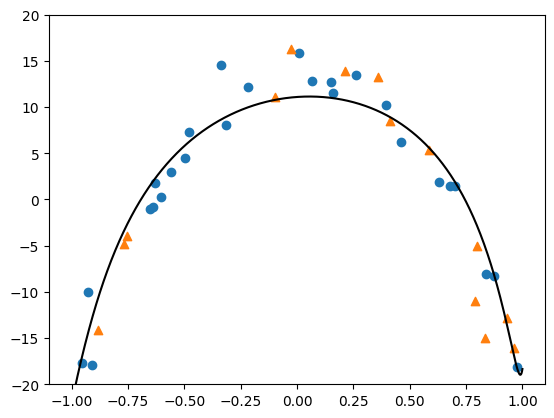

Polynomial coefficients
[np.float64(11.09356999623911), np.float64(1.711662021859508), np.float64(-15.407968121223151), np.float64(0.1782355097402668), np.float64(-8.3262365789136), np.float64(-0.39846561055028407), np.float64(-4.502808717142412), np.float64(-0.49466798867105277), np.float64(-2.5644439963692185), np.float64(-0.4158663617926311), np.float64(-1.5168087163730128), np.float64(-0.3068237421542868), np.float64(-0.9061976501291598), np.float64(-0.21347167592324764), np.float64(-0.5279016154190956), np.float64(-0.14369250859989421), np.float64(-0.28392725739612096), np.float64(-0.09395948560928394), np.float64(-0.12336173999267369), np.float64(-0.058781387428145294), np.float64(-0.017369567708326095), np.float64(-0.033479383582437315), np.float64(0.05169365106363999), np.float64(-0.014678547189634827), np.float64(0.09529804542335285), np.float64(-0.00012866181422453368), np.float64(0.12122284400122374), np.float64(0.011599514007674793), np.float64(0.13488896674678857), np.floa

In [106]:
display_results(model_L2_reg)
# display_results(lr_model)

## Viewing the predictions in the testing set

In [110]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,-0.883898,-14.073180,6.770772e+06,-11.857285,-10.810044
1,0.586650,5.348645,8.546912e+02,3.733568,5.571916
2,0.796346,-4.987022,-1.296359e+05,-5.278500,-2.705990
3,0.933098,-12.859526,-1.266044e+08,-12.918873,-13.751364
4,-0.752210,-3.922892,9.512054e+04,-4.697423,-2.645849
5,0.410567,8.514169,-1.522979e+01,8.971161,8.945183
6,0.361178,13.233923,5.412548e+01,10.079660,9.554834
7,0.212677,13.890973,2.721336e+00,12.496542,10.744745
8,0.961033,-16.110982,-5.946615e+08,-14.662422,-16.768535
9,0.790078,-10.981245,-1.146563e+05,-4.962811,-2.344432


### Real Example (Predict fuel efficiency)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
#### Get data

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()

#### Clean data

dataset.isna().sum()

dataset = dataset.dropna()

dataset.isna().sum()

dataset.head()

dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

dataset.head()

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

#### using 50th order

In [ ]:
from sklearn import preprocessing

X_train=train_dataset[['Horsepower']]
y_train=train_dataset[['MPG']]

X_test=test_dataset[['Horsepower']]
y_test=test_dataset[['MPG']]

from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    poly = PolynomialFeatures(polyDegree,include_bias=False)
    X=poly.fit_transform(X)
    return X

X_trainPoly=addPoly(X_train,50)
X_testPoly=addPoly(X_test,50)
scaler=preprocessing.StandardScaler().fit(X_trainPoly)

X_trainPoly=scaler.transform(X_trainPoly)
X_testPoly=scaler.transform(X_testPoly)

##### no regularization

In [ ]:
# no regularization
from sklearn.linear_model import LinearRegression
model_no_reg = LinearRegression()
model_no_reg.fit(X_trainPoly, y_train)
ytest_predict=model_no_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

##### lasso regularization

In [ ]:
# lasso regularization
from sklearn import linear_model
model_L1_reg = linear_model.Lasso(alpha=0.5)
model_L1_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L1_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

##### ridge regularization

In [ ]:
# ridge regularization
from sklearn import linear_model
model_L2_reg = linear_model.Ridge(alpha=0.5)
model_L2_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L2_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)